In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from distort_image_ import distort_image

path ="../dataset/lab2_2_data"

In [4]:
im=[]
for i in range(3):    
    im.append( pd.read_csv(path + f"/p{i}.csv", header=None))
    im[i]=np.array(im[i])
    im[i]=im[i].reshape(32,32).T



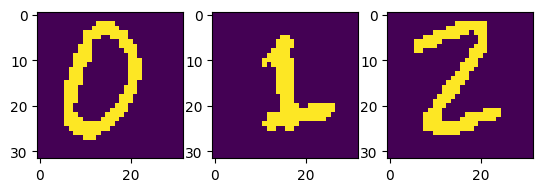

In [5]:
fig, axs = plt.subplots(1,3)

for i, ax in enumerate(axs):
    ax.imshow(im[i])

In [6]:
p1 = np.array([-1, -1, +1, -1, +1, -1, -1, +1]) # --+-+--+
p2 = np.array([-1, -1, -1, -1, -1, +1, -1, -1])
p3 = np.array([-1, +1, +1, -1, -1, +1, -1, +1])
p =[p1,p2,p3]
np.corrcoef(p)

array([[ 1.        , -0.29277002,  0.25819889],
       [-0.29277002,  1.        ,  0.37796447],
       [ 0.25819889,  0.37796447,  1.        ]])

In [80]:
class HopfieldNetwork():
    def __init__(self) -> None:
        self.W = None

    def _training(self, data: np.array):
        n_examples, dim = data.shape
        self.W = np.zeros((dim,dim ))
        for i in range(n_examples):
            self.W += np.outer(data[i], data[i])
        self.W = self.W - n_examples * np.eye(dim)
        self.W /= dim
        self.n_examples = n_examples
        self.dim = dim
    '''
    def _compute_energy(self, x_new, x_old,  neuron, Wx):
        # new Wx = Wx - W[neuron, :] * x_old[neuron] + W[neuron, :] * x_new[neuron]
        print(Wx.shape)
        Wx = Wx - (self.W[:, neuron] * x_old[neuron] + self.W[:, neuron] * x_new[neuron]).reshape(-1,1)
        print(Wx.shape, x_old.shape, x_new.shape)
        new_energy = -1/2 * x_new.T @ Wx
        print(new_energy.shape)
        return new_energy, Wx '''
    
    def retrieval(self, x, data, max_steps, bias =0.6, compute_energy = False):
        self._training(data) # train the network
        if compute_energy:
            self.energy = []
            Wx = np.dot(self.W, x)
            inefficient_new_energy = (-1/2 *x.T @ Wx)
            self.energy.append(inefficient_new_energy)
        x_new = x.copy()
        for i in range(max_steps):
            neurons = np.random.permutation(self.dim)
            x_old = x_new.copy()
            for neuron in neurons: 
                new_value = np.dot(self.W[neuron, :], x_new)+ bias  
                x_new[neuron] = np.sign(new_value)
                if compute_energy:
                    new_energy = (-1/2 *x_new.T @ self.W @ x_new) # TODO: is there a more efficient way to update from the last energy?
                    self.energy.append(new_energy) 
            if np.all(x_old == x_new): # checks if after a change to every component, the vector is the same. 
                print(f'converged in {i+1} steps')
                break
        return x_new
    
    def plot_energy(self):
        if not hasattr(self, 'energy'):
            print('energy not computed')
            return
        self.energy = np.array(self.energy).reshape(-1,)

        plt.plot(self.energy)
        plt.title('Energy over iterations')
        plt.xlabel('iteration')
        plt.ylabel('energy')
        plt.show()

    

In [81]:
images =np.array(im)
images = images.reshape(3,-1)

converged in 2 steps


Text(0.5, 1.0, 'original image')

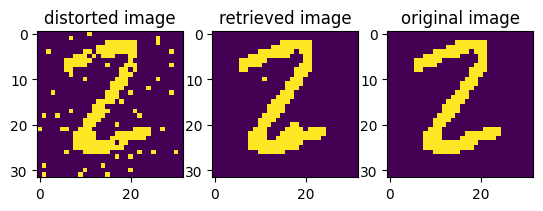

In [94]:
orig = im[2]
dist_img =distort_image(orig, 0.05)
fig, axes =plt.subplots(1,3)
axes[0].imshow(dist_img)
axes[0].set_title('distorted image')
dist_img = dist_img.reshape(-1,1)
hopfield_net= HopfieldNetwork()

retrieved = hopfield_net.retrieval(dist_img, images, 100, bias =0.6, compute_energy=True)

axes[1].imshow(retrieved.reshape(32,32))
axes[1].set_title('retrieved image')

axes[2].imshow(orig)
axes[2].set_title('original image')


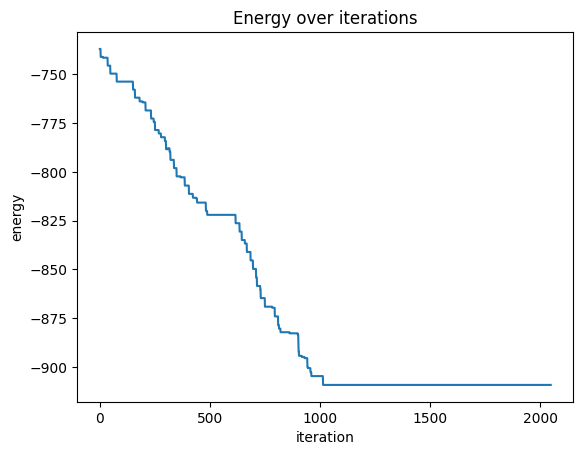

In [95]:
hopfield_net.plot_energy()
